In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [0]:
data= pd.read_csv('ess_combined_2012_2014.csv')
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


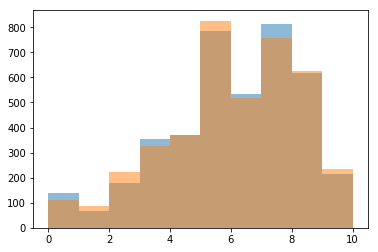

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


In [0]:
_2012 = data[data['year']==6]
_2014 = data[data['year']==7]

plt.hist(_2012['ppltrst'], alpha = .5)
plt.hist(_2014['ppltrst'], alpha = .5)
plt.show()

print(stats.describe(_2012['ppltrst']))
print(stats.describe(_2014['ppltrst']))




In [0]:
print(stats.shapiro(_2012['ppltrst']))
print(stats.shapiro(_2014['ppltrst']))

print(stats.describe(_2012['ppltrst']))
print(stats.describe(_2014['ppltrst']))

## W is close to 1 and P is more than 0.5 hence normally distributed.


(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)
DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


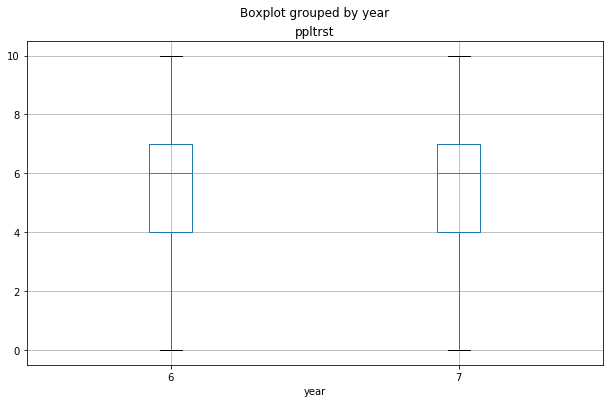

In [0]:
data.boxplot('ppltrst', by='year', figsize=(10, 6))

#as you can see there ain't no much differece ;)

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

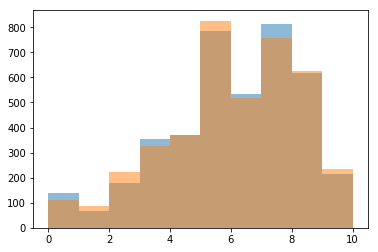

In [0]:
##Q2) did people become happier from year 2012 to 2014 

plt.hist(_2012['ppltrst'], alpha = .5)
plt.hist(_2014['ppltrst'], alpha = .5)

stats.ttest_ind(_2012['ppltrst'], _2014['ppltrst'])

## fail to reject as we have a p value greater than 0.05 and static value less than 1.96

In [0]:
print(stats.shapiro(_2012['happy']))
print(stats.shapiro(_2014['happy']))

print(stats.describe(_2012['happy']))
print(stats.describe(_2014['happy']))

(0.8943395018577576, 0.0)
(0.9060227870941162, 1.2611686178923354e-44)
DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


In [0]:
# W value is close to 1. However, p value is less that 0.05
## less than 0.05 indicates non normality.

In [0]:
## Lets use kruskal since it is not normally distributed.
stats.kruskal(
    _2012['happy'],
    _2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

In [0]:
## 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. 4
## Are there differences, and if so, which countries stand out?

data['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AC4D9D7240>,
      dtype=object)

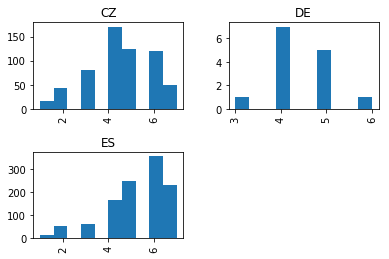

In [0]:
_3cntry_ = ['CZ', 'DE', 'ES']

_2014_country = _2014[_2014['cntry'].isin(_3cntry_)]

_2014_country['cntry'].unique()

_2014_country['sclmeet'].hist(by = _2014_country['cntry'])

In [0]:
## since its all sparsed, we have to eye ball the data. We can use kruskal Wallis test

stats.kruskal(
    _2014_country.loc[_2014_country['cntry'] == 'CZ',['sclmeet']],
    _2014_country.loc[_2014_country['cntry'] == 'DE',['sclmeet']],
    _2014_country.loc[_2014_country['cntry'] == 'ES',['sclmeet']])


KruskalResult(statistic=120.72958033262947, pvalue=6.0800161031835895e-27)

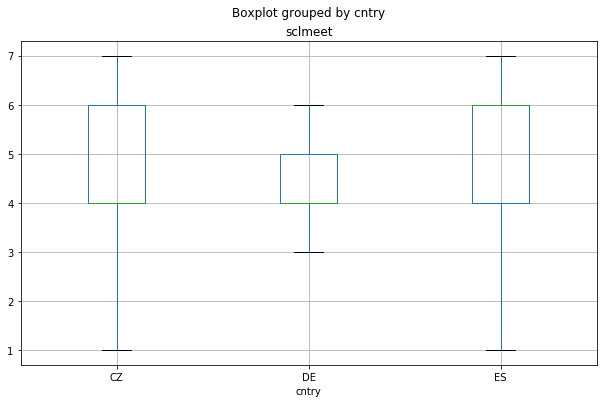

In [0]:
# DE appears to be standing out

_2014_country.boxplot('sclmeet', by='cntry', figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AC4D39F438>,
      dtype=object)

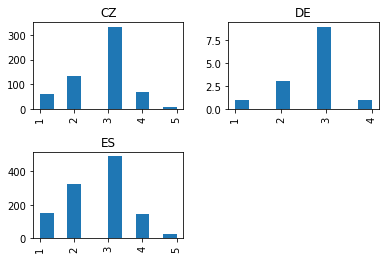

In [0]:
##Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. 
##Are there differences, and if so, which countries stand out?
_2014_country['sclact'].hist(by = _2014_country['cntry'])

In [0]:
## They look a bit symmetrical and normal so lets try ANNOVA

stats.f_oneway(
    _2014_country.loc[_2014_country['cntry'] == 'CZ',['sclact']],
    _2014_country.loc[_2014_country['cntry'] == 'DE',['sclact']],
    _2014_country.loc[_2014_country['cntry'] == 'ES',['sclact']])

F_onewayResult(statistic=array([2.28963493]), pvalue=array([0.10160666]))

In [0]:
## Since P value is greater than 0.0001 we can say that ther isn't any significant difference.
## Lets try pairwise statistics

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = _2014_country['sclact'],      # Data
                          groups = _2014_country['cntry'],   # Groups
                          alpha=0.05) 


tukey.summary()

group1,group2,meandiff,lower,upper,reject
CZ,DE,-0.0151,-0.5946,0.5644,False
CZ,ES,-0.098,-0.2058,0.0099,False
DE,ES,-0.0829,-0.6594,0.4936,False


In [0]:
# https://www.parinc.com/Products/Pkey/360
# https://datadryad.org/resource/doi:10.5061/dryad.rr138
rfft = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
rfft.head(20)

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362
5,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),71.0,0.5,2.376454483
6,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),91.0,11.0,Not applicable
7,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),83.5,21.0,2.628552653
8,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),77.0,17.0,3.392197125
9,4,70,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),59.0,49.0,Not applicable


In [0]:
## 1.Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

rfft_unique = rfft.pivot(index='Casenr', columns='Measurement', values='Unique')
rfft_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


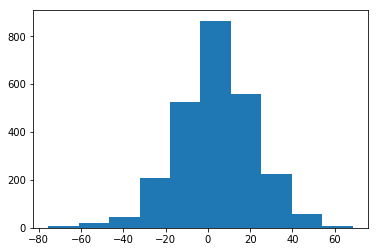

In [0]:
plt.hist(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)'])
print(stats.describe(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)']))
# q to mentor: why are we taking difference and not plotting 2 histograms

In [0]:
## We are taking the difference of measurements 1 and 2 and find that its normally distributed

stats.ttest_rel(rfft_unique['Measurement 3 (2008-2012)'], rfft_unique['Measurement 2 (2006-2008)'])

## P values are greater than 0.05, so the test is not significant, fail to reject.

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

In [0]:
##Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

rfft_persev = rfft.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfft_persev.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

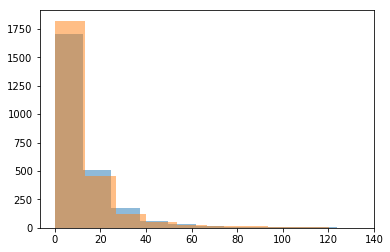

In [0]:
plt.hist(rfft_persev['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfft_persev['Measurement 2 (2006-2008)'], alpha = .5)

In [0]:
## Looks non normal so we will use Wilcoxon

# Reject the null, there is a significant difference between perseverative errors from participants @ measurements 3 and 2

stats.wilcoxon(rfft_persev['Measurement 3 (2008-2012)'], rfft_persev['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)